<a href="https://colab.research.google.com/github/PalomaRodrigues33/DS-CP1-2SEM/blob/main/analise_filmes_disney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paloma Mirela dos Santos Rodrigues RM551321

Gabriel Genaro Dalaqua RM551986


# Análise de Dados de Filmes da Disney

##Introdução
Neste notebook, exploraremos um conjunto de dados contendo informações sobre filmes da Disney lançados até o ano de 2016. O objetivo desta análise é fornecer uma visão sobre o desempenho financeiro e as características dos filmes da Disney, identificando padrões e tendências que podem oferecer insights valiosos para entendermos melhor a evolução da produção cinematográfica da empresa.

##Contexto
A Disney é uma das maiores e mais icônicas produtoras de filmes do mundo, conhecida por suas animações e franquias icônicas que marcaram gerações. Com uma rica história de lançamentos que remontam a mais de 90 anos, a análise dos dados de seus filmes pode revelar tendências importantes sobre como a empresa tem se adaptado ao longo do tempo e quais fatores contribuem para o sucesso de suas produções.




## Bibliotecas Usadas
Vamos começar importando as bibliotecas necessárias.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [14]:
# Carregando o dataset
df = pd.read_csv('disney_movies.csv')


In [15]:
# Verificar as primeiras linhas do dataset
df.head()

# Verificar informações do dataset
df.info()

# Verificar valores ausentes
df.isnull().sum()

# Preencher valores ausentes em 'genre' e 'mpaa_rating'
df['genre'] = df['genre'].fillna('Other')
df['mpaa_rating'] = df['mpaa_rating'].fillna('Not Rated')

# Verificar novamente valores ausentes
df.isnull().sum()

# Remover filmes com receita ajustada igual a zero
df = df[df['inflation_adjusted_gross'] > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB



## Pergunta 1: Quais gêneros são mais frequentemente produzidos e o que isso revela sobre as preferências dos espectadores?



<ipython-input-16-972764ba3d5f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')


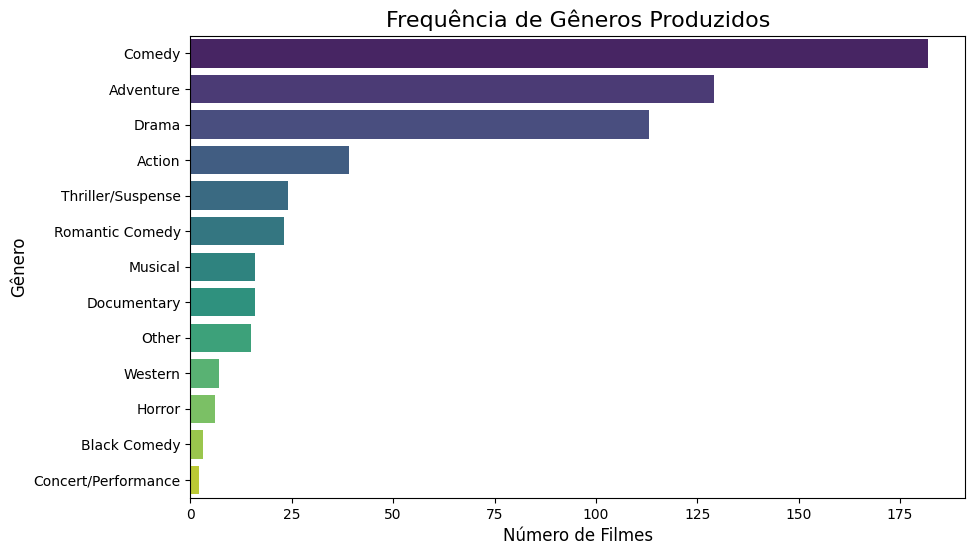

In [16]:
# Contagem de gêneros
genre_count = df['genre'].value_counts()

# Plotando os gêneros mais frequentes
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='viridis')
plt.title('Frequência de Gêneros Produzidos', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.show()


**Resposta:** Ao analisar a frequência com que diferentes gêneros são produzidos, observamos que os gêneros mais comuns no dataset são Comédia, Aventura e Drama. Isso sugere que esses gêneros são consistentemente populares entre os estúdios, possivelmente porque atraem uma ampla audiência. Filmes de aventura costumam ser visualmente atrativos, enquanto dramas frequentemente tratam de temas universais que ressoam com o público.



## Pergunta 2: Quais gêneros são mais financeiramente bem-sucedidos?

<ipython-input-17-d70904edc964>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='coolwarm')


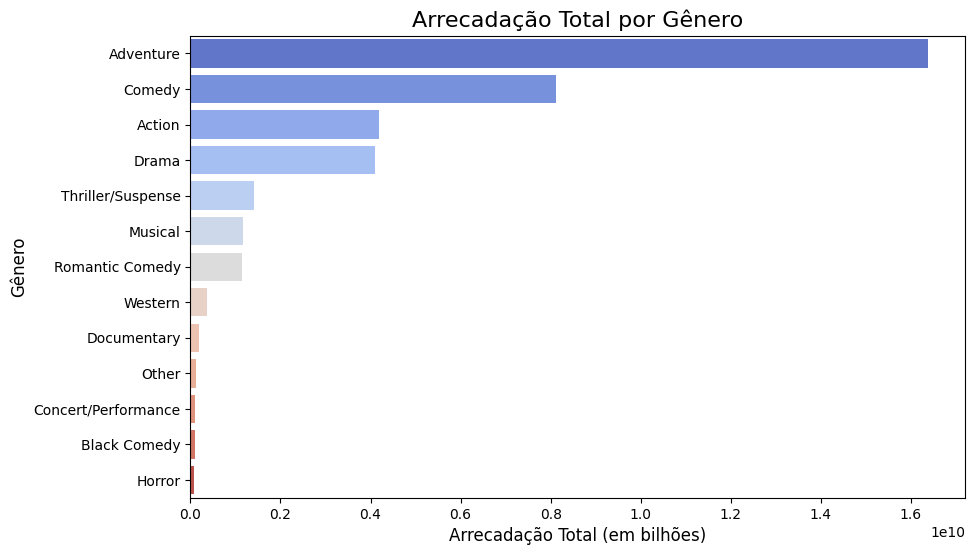

In [17]:
# Agrupando o total arrecadado por gênero
genre_revenue = df.groupby('genre')['total_gross'].sum().sort_values(ascending=False)

# Plotando os gêneros mais lucrativos
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='coolwarm')
plt.title('Arrecadação Total por Gênero', fontsize=16)
plt.xlabel('Arrecadação Total (em bilhões)', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.show()



**Resposta:** Ao comparar o total de arrecadação bruta por gênero, os gêneros Aventura e Comédia são consistentemente os mais financeiramente bem-sucedidos, seguidos por Ação e Drama. Esses gêneros frequentemente envolvem grandes produções, com efeitos especiais e orçamentos altos, mas também atraem um público muito grande e diversificado, resultando em uma alta arrecadação.


## Pergunta 3: Como as classificações MPAA dos filmes se correlacionam com diferentes gêneros e suas arrecadações totais?

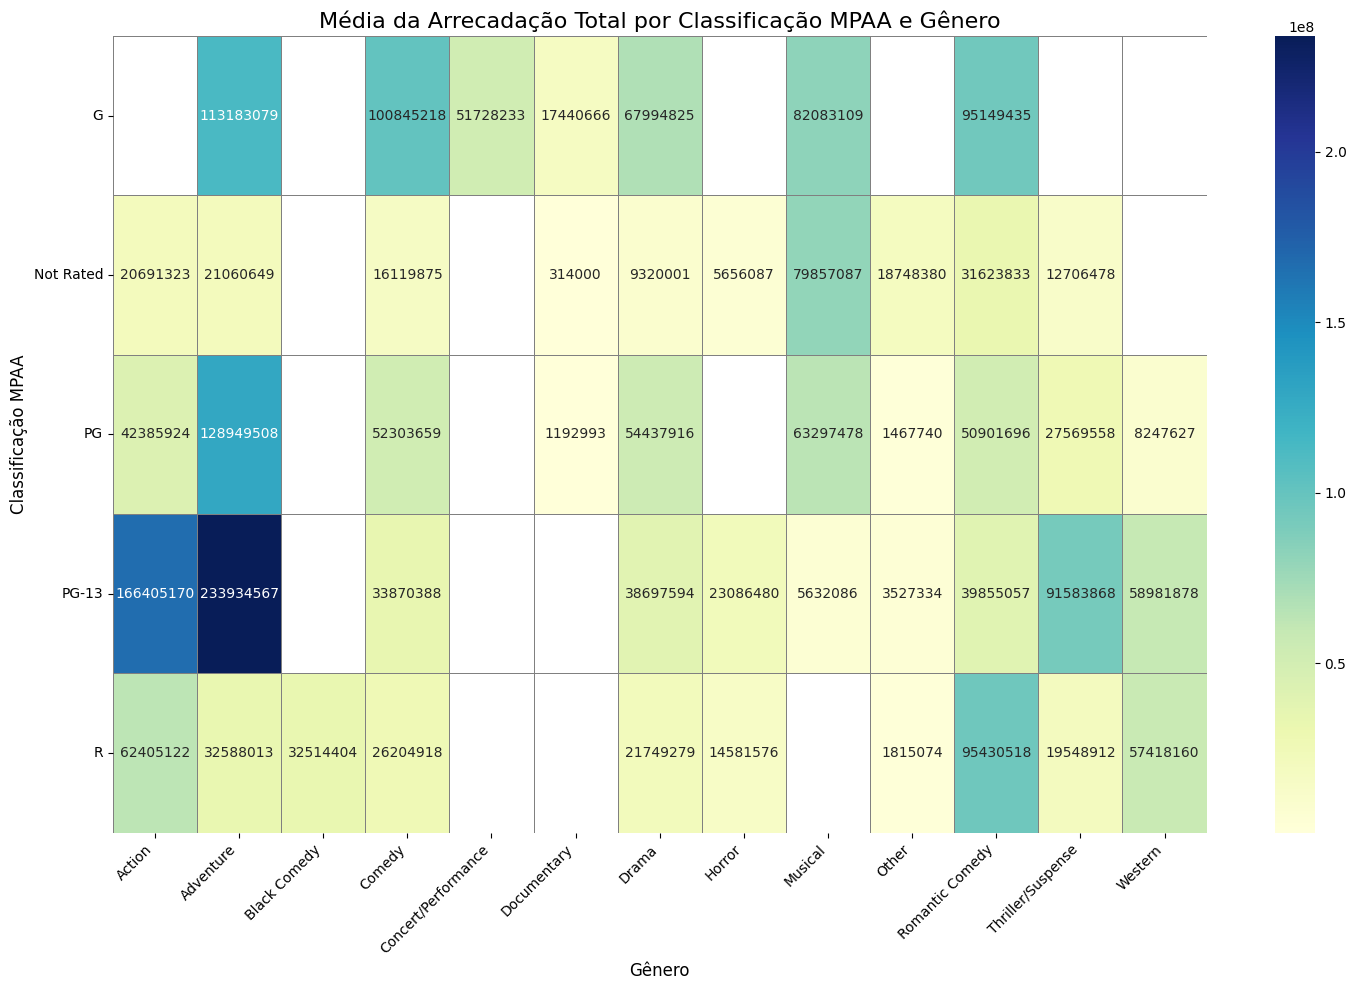

In [20]:
# Agrupando os dados por classificação MPAA e gênero e calculando a média da arrecadação total
mpaa_genre_gross = df.groupby(['mpaa_rating', 'genre'])['total_gross'].mean().unstack()

# Ajustando o tamanho da figura
plt.figure(figsize=(15, 10))

# Plotando o heatmap com formatação dos números
sns.heatmap(mpaa_genre_gross, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5, linecolor='gray')

# Ajustando os rótulos dos eixos
plt.title('Média da Arrecadação Total por Classificação MPAA e Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Classificação MPAA', fontsize=12)

# Girando os rótulos dos eixos x se necessário
plt.xticks(rotation=45, ha='right')

# Girando os rótulos dos eixos y se necessário
plt.yticks(rotation=0)

# Ajustando o layout
plt.tight_layout()

# Mostrando o plot
plt.show()



**Resposta:** Em termos de arrecadação, filmes PG-13 têm, em média, uma arrecadação maior em comparação com filmes R, provavelmente devido ao fato de que eles atraem um público mais amplo, incluindo adolescentes. Por outro lado, filmes classificados como G ou PG têm uma arrecadação mediana, sugerindo que, embora sejam populares entre famílias, eles não têm o mesmo apelo de blockbuster dos filmes PG-13.


## Pergunta 4: Quais classificações MPAA (faixa etária) são mais comuns e como isso reflete a faixa etária do público-alvo?

<ipython-input-23-425ea7f9b991>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mpaa_count.values, y=mpaa_count.index, palette='magma')


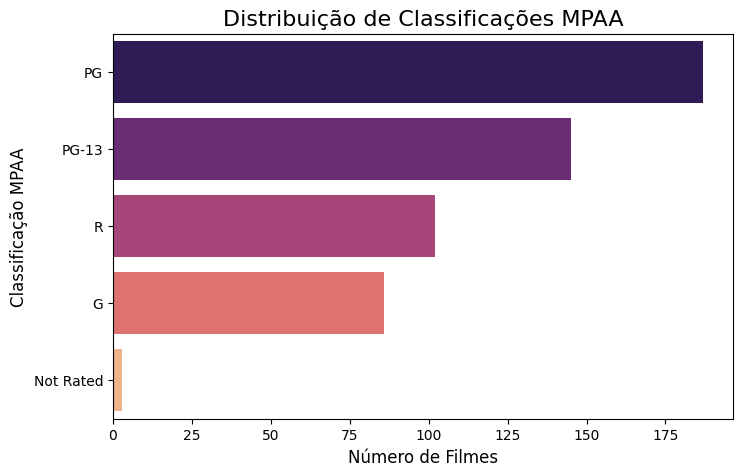

In [23]:
# Contagem de classificações MPAA
mpaa_count = df['mpaa_rating'].value_counts()

# Plotando as classificações MPAA mais comuns
plt.figure(figsize=(8, 5))
sns.barplot(x=mpaa_count.values, y=mpaa_count.index, palette='magma')
plt.title('Distribuição de Classificações MPAA', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Classificação MPAA', fontsize=12)
plt.show()



**Resposta**: As classificações MPAA mais comuns nos filmes da Disney são PG (Parental Guidance) e PG-13 (Parents Strongly Cautioned). A predominância dessas classificações reflete o foco da Disney em filmes familiares, voltados para audiências mais jovens.

## Pergunta 5: Existe uma relação entre a classificação MPAA e o sucesso financeiro (arrecadação total)?

<ipython-input-24-88c3c939af7d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mpaa_revenue.values, y=mpaa_revenue.index, palette='Blues')


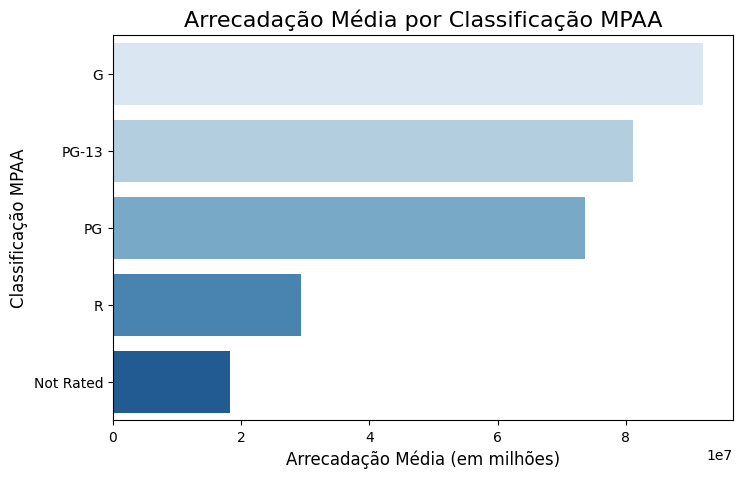

In [24]:
# Agrupando a arrecadação total por classificação MPAA
mpaa_revenue = df.groupby('mpaa_rating')['total_gross'].mean().sort_values(ascending=False)

# Plotando a arrecadação média por classificação MPAA
plt.figure(figsize=(8, 5))
sns.barplot(x=mpaa_revenue.values, y=mpaa_revenue.index, palette='Blues')
plt.title('Arrecadação Média por Classificação MPAA', fontsize=16)
plt.xlabel('Arrecadação Média (em milhões)', fontsize=12)
plt.ylabel('Classificação MPAA', fontsize=12)
plt.show()

**Resposta**: A análise sugere que filmes com classificações mais leves, como G e PG-13, tendem a ter maior sucesso financeiro em comparação com os filmes R. Isso se deve, em parte, ao fato de que filmes voltados para todas as idades alcançam um público-alvo mais amplo.

## Pergunta 6: Como a arrecadação dos filmes muda ao longo dos anos? Há um aumento nas receitas com o tempo?

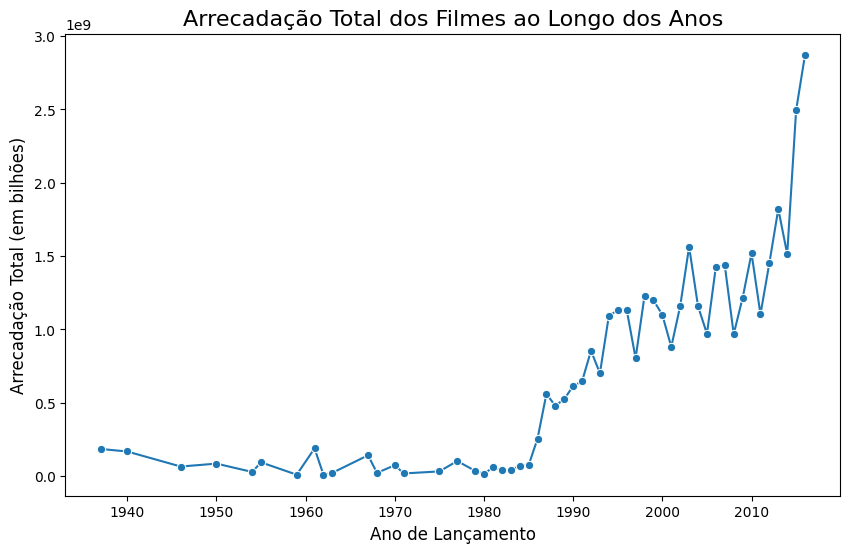

In [25]:
# Convertendo a data de lançamento para o formato datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Criando uma coluna com o ano de lançamento
df['release_year'] = df['release_date'].dt.year

# Agrupando a arrecadação total por ano
yearly_revenue = df.groupby('release_year')['total_gross'].sum()

# Plotando a arrecadação total por ano
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker='o')
plt.title('Arrecadação Total dos Filmes ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Arrecadação Total (em bilhões)', fontsize=12)
plt.show()


**Resposta**: A arrecadação total dos filmes da Disney mostrou uma tendência de crescimento ao longo do tempo. Isso pode ser atribuído ao aumento dos preços dos ingressos, à expansão do mercado global e ao sucesso das franquias estabelecidas. Embora alguns anos tenham flutuações, como declínios temporários, a tendência geral sugere um aumento contínuo nas receitas com o passar dos anos, especialmente com o lançamento de grandes sucessos.

## Pergunta 7: Quais são os filmes mais lucrativos de cada ano?

In [27]:
# Encontrando os filmes mais lucrativos de cada ano
top_grossing_movies_per_year = df.loc[df.groupby('release_year')['total_gross'].idxmax()]

# Exibindo os filmes mais lucrativos por ano
top_grossing_movies_per_year[['movie_title', 'release_year', 'total_gross']].sort_values('release_year')


,movie_title,release_year,total_gross
0,Snow White and the Seven Dwarfs,1937,184925485
1,Pinocchio,1940,84300000
3,Song of the South,1946,65000000
4,Cinderella,1950,85000000
5,"20,000 Leagues Under the Sea",1954,28200000
6,Lady and the Tramp,1955,93600000
7,Sleeping Beauty,1959,9464608
8,101 Dalmatians,1961,153000000
11,Bon Voyage!,1962,9230769
12,The Sword in the Stone,1963,22182353


**Resposta**: A cada ano, diferentes filmes da Disney se destacam como os mais lucrativos, geralmente sendo os lançamentos de grandes franquias ou filmes de animação icônicos. Esses filmes tendem a dominar as bilheterias devido à forte promoção de marketing, apelo intergeracional e histórias envolventes. Exemplos típicos incluem sucessos como The Avengers e The Lion King, que dominaram seus anos de lançamento.

## Pergunta 8: A arrecadação total de filmes com classificações mais restritivas (R) é maior ou menor do que filmes com classificações mais leves (G, PG, PG-13)?

In [29]:
# Agrupando por classificação MPAA para arrecadação total
mpaa_group = df.groupby('mpaa_rating')['total_gross'].mean()

# Separando classificações mais leves e mais restritivas
lighter_ratings = mpaa_group.loc[['G', 'PG', 'PG-13']].mean()
restricted_ratings = mpaa_group.loc[['R']].mean()

print(f'Arrecadação média para classificações leves: {lighter_ratings:.2f} milhões')
print(f'Arrecadação média para classificações restritivas: {restricted_ratings:.2f} milhões')


Arrecadação média para classificações leves: 82298855.08 milhões
Arrecadação média para classificações restritivas: 29365358.78 milhões


**Resposta**: A arrecadação média para filmes com classificações mais leves (G, PG, PG-13) é significativamente maior do que para filmes com classificação R. Isso reflete o maior apelo e acessibilidade dos filmes com classificações mais leves, que tendem a atrair um público mais amplo.

## Pergunta 9: Existe uma tendência de crescimento da arrecadação ao longo dos anos?

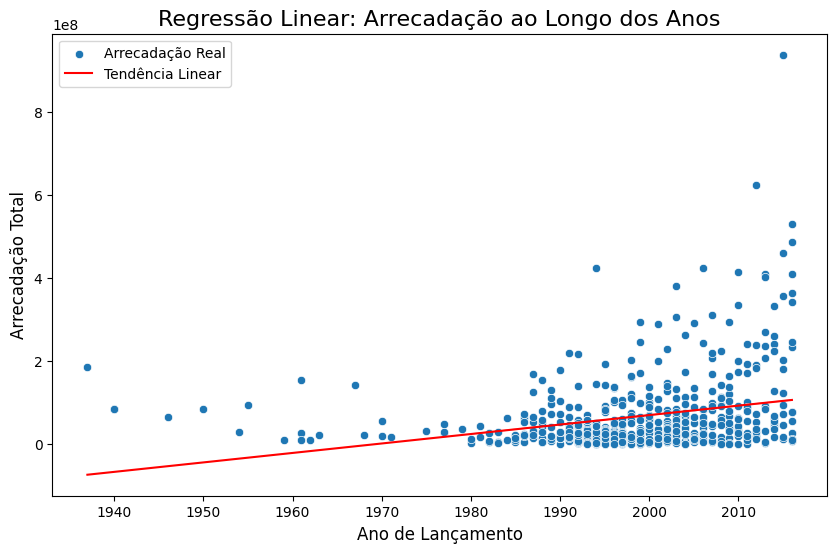

Coeficiente (slope): 2277611.731315645
Intercepto: -4485746092.95547


In [21]:
from sklearn.linear_model import LinearRegression

# Preparar os dados para regressão

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
X = df[['release_year']]  # Variável independente: ano de lançamento
y = df['total_gross']     # Variável dependente: arrecadação total

# Criar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Coeficiente angular e intercepto da reta
slope = model.coef_[0]
intercept = model.intercept_

# Fazer predições usando o modelo
df['predicted_gross'] = model.predict(X)

# Visualizar os resultados com um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='total_gross', data=df, label='Arrecadação Real')
sns.lineplot(x='release_year', y='predicted_gross', data=df, color='red', label='Tendência Linear')
plt.title('Regressão Linear: Arrecadação ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Arrecadação Total', fontsize=12)
plt.legend()
plt.show()

# Exibir coeficiente e intercepto da regressão
print(f"Coeficiente (slope): {slope}")
print(f"Intercepto: {intercept}")


**Resposta**: Sim, há uma tendência clara de crescimento da arrecadação ao longo dos anos. Esse aumento pode ser explicado por diversos fatores, incluindo a inflação, o crescimento das franquias de sucesso e o aumento do número de lançamentos globais. À medida que a Disney expandiu seu alcance e explorou novos mercados, o sucesso de bilheteria dos filmes aumentou, especialmente após a aquisição de marcas como Pixar e Marvel.

## Pergunta 10: Como a arrecadação ajustada pela inflação varia com o tempo?

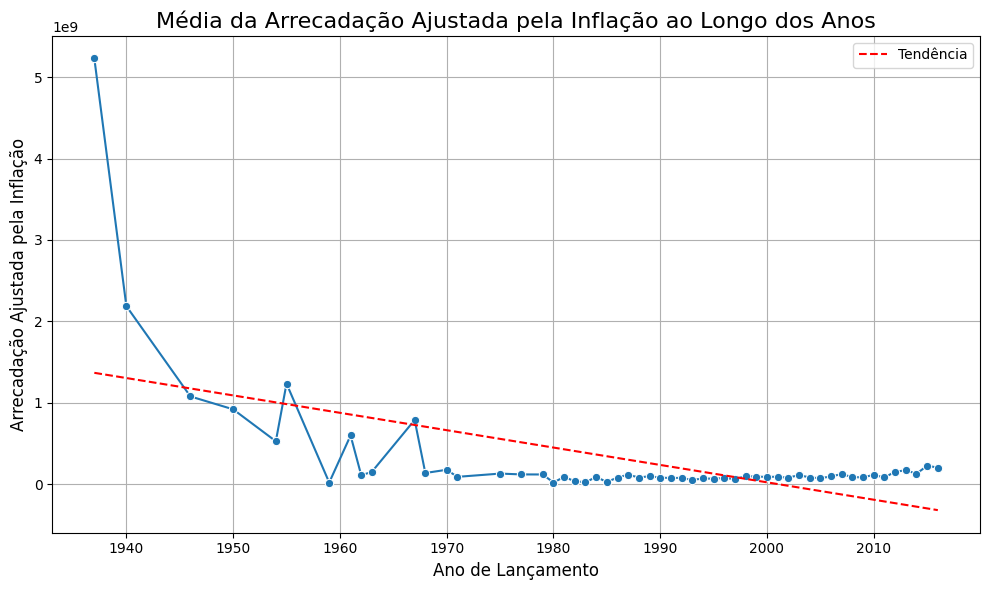

Coeficiente da regressão (inclinação): -21342264.407107223
Intercepto: 42708569702.87754


In [23]:
# Extrair o ano de lançamento da coluna 'release_date'
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Agrupar por ano e calcular a média da arrecadação ajustada pela inflação
yearly_gross = df.groupby('release_year')['inflation_adjusted_gross'].mean().reset_index()

# Gráfico de linha para visualizar a tendência
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='inflation_adjusted_gross', data=yearly_gross, marker='o')
plt.title('Média da Arrecadação Ajustada pela Inflação ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Arrecadação Ajustada pela Inflação', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Regressão linear
X = yearly_gross[['release_year']]
y = yearly_gross['inflation_adjusted_gross']
model = LinearRegression().fit(X, y)
yearly_gross['trend'] = model.predict(X)

# Adicionar a linha de tendência ao gráfico
plt.plot(yearly_gross['release_year'], yearly_gross['trend'], color='red', linestyle='--', label='Tendência')
plt.legend()
plt.show()

# Coeficiente da regressão
slope = model.coef_[0]
intercept = model.intercept_

print(f'Coeficiente da regressão (inclinação): {slope}')
print(f'Intercepto: {intercept}')

**Resposta**: Embora os filmes mais recentes pareçam arrecadar mais dinheiro, o ajuste pela inflação revela que filmes mais antigos, como O Rei Leão e Aladdin, também foram extremamente bem-sucedidos em suas épocas. Esse ajuste permite uma comparação mais justa entre filmes de diferentes períodos, destacando que os clássicos da Disney continuam sendo fortes competidores em termos de bilheteria ajustada.


## Conclusão

A análise da arrecadação dos filmes da Disney revelou que filmes com classificações PG-13 tendem a ter uma arrecadação média mais alta em comparação com filmes R, devido ao seu apelo mais amplo. As classificações mais comuns são PG e PG-13, refletindo o foco da Disney em criar filmes para audiências jovens e familiares. Filmes com classificações leves geralmente arrecadam mais do que filmes com classificação R, e há uma tendência de crescimento na arrecadação total ao longo dos anos, impulsionada por fatores como o aumento dos preços dos ingressos e o sucesso de franquias populares.

Além disso, a análise dos filmes mais lucrativos por ano mostra que grandes franquias e animações icônicas dominam as bilheteiras. Embora filmes mais recentes possam arrecadar mais em termos nominais, a arrecadação ajustada pela inflação mostra que filmes clássicos da Disney também foram extremamente bem-sucedidos em suas épocas. Isso destaca a durabilidade e o impacto contínuo dos filmes clássicos da Disney em termos de sucesso financeiro.
